Confusion Matrix:
 [[71  1]
 [ 3 39]]
Precision: 0.975
Recall: 0.929
ROC-AUC Score: 0.996


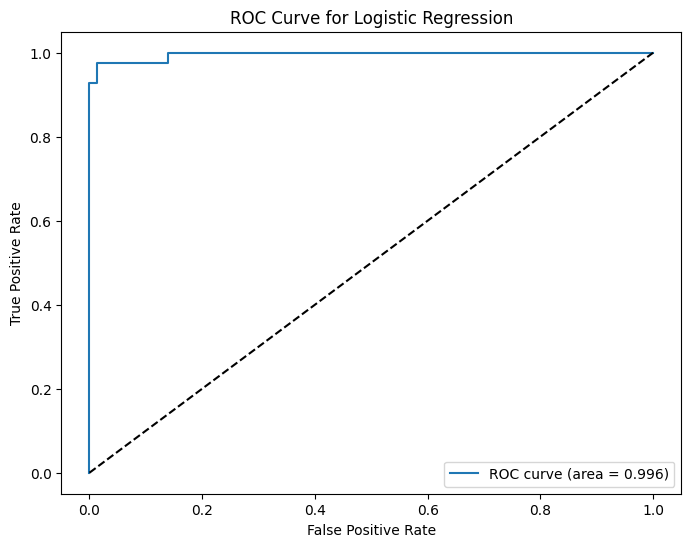

Confusion Matrix at threshold=0.3:
 [[71  1]
 [ 1 41]]
Precision: 0.976
Recall: 0.976


In [51]:
# Step 0: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('/content/Breast Cancer Wisconsin (Diagnostic) Data Set.csv')

# Drop ID column and any unnamed columns if present
df = df.drop(['id'], axis=1)
if 'Unnamed: 32' in df.columns:
    df = df.drop(['Unnamed: 32'], axis=1)

# Step 2: Encode diagnosis column
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])  # M=1 (malignant), B=0 (benign)

# Step 3: Split features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Step 4: Train/test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Step 7: Predict and evaluate
y_pred = model.predict(X_test_scaled)
y_probs = model.predict_proba(X_test_scaled)[:, 1]

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")

roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {roc_auc:.3f}")

# Step 8: Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Step 9: Tune decision threshold
threshold = 0.3
y_pred_thresh = (y_probs >= threshold).astype(int)

cm_thresh = confusion_matrix(y_test, y_pred_thresh)
print(f"Confusion Matrix at threshold={threshold}:\n", cm_thresh)
print(f"Precision: {precision_score(y_test, y_pred_thresh):.3f}")
print(f"Recall: {recall_score(y_test, y_pred_thresh):.3f}")
